In [7]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import diptest.diptest

%matplotlib inline

In [8]:
from numpy.random import choice

# Test diptest on simulated distributions

In [3]:
dat = np.random.normal(size=200)
dat2 = np.random.normal(loc=4, size=200)
datC = np.concatenate([dat, dat2])

(array([  1.,   3.,  33.,  79.,  65.,  36.,  58.,  83.,  33.,   9.]),
 array([-4.0619644 , -2.95400125, -1.8460381 , -0.73807494,  0.36988821,
         1.47785136,  2.58581451,  3.69377766,  4.80174081,  5.90970397,
         7.01766712]),
 <a list of 10 Patch objects>)

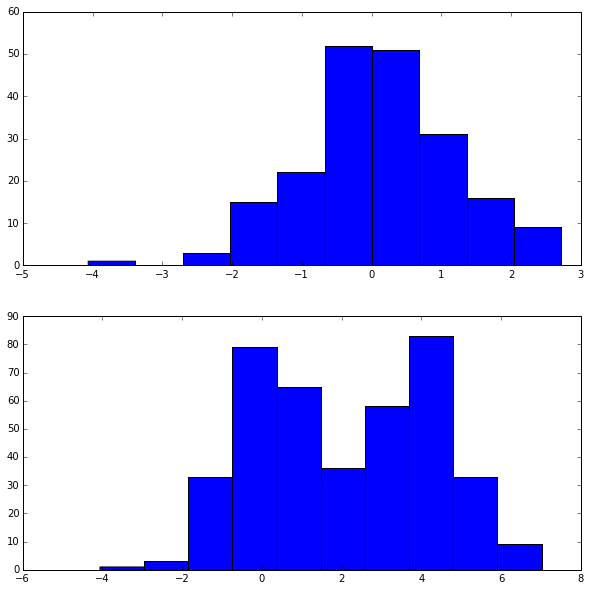

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.hist(dat)
ax2.hist(datC)

In [5]:
print(diptest.diptest.diptest(dat))
kde = sp.stats.gaussian_kde(dat)
x_grid = np.linspace(min(dat), max(dat), 1000)
plt.plot(np.cumsum(kde.evaluate(x_grid)))

(0.023592414673270577, 0.6494307479884124)


AttributeError: 'module' object has no attribute 'stats'

In [6]:
print(diptest.diptest.diptest(datC))
kde = sp.stats.gaussian_kde(datC)
x_grid = np.linspace(min(datC), max(datC), 1000)
plt.plot(np.cumsum(kde.evaluate(x_grid)))

(0.047527049109633755, 2.6724431375635405e-06)


AttributeError: 'module' object has no attribute 'stats'

# Try it on real data

In [26]:
import tapeAnalyst.analysis as analysis
import tapeAnalyst.gel_processing as gp

In [27]:
dfS = pd.read_csv('/Users/fearjm/devel/tapeAnalyst/data/JH_sample.csv', encoding='ISO-8859-1')
dfS.columns = ['wellID', 'conc', 'description', 'alert', 'notes']

In [129]:
gel = gp.TapeStationGel('/Users/fearjm/devel/tapeAnalyst/data/JH_gel.png', dfS)

(0.03461538461538462, 0.028267095333036063)


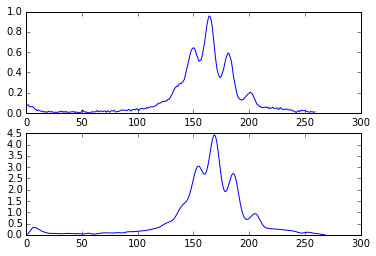

In [311]:
lane = gel.lanes[13]

sec = lane.laneMean[140:400]
smooth = sp.signal.convolve(sec, sp.signal.hamming(10))

x_grid = np.arange(0, smooth.shape[0])
norm = smooth / smooth.sum()
sim = np.random.choice(x_grid, size=3000, replace=True, p=norm)

print(analysis.diptest(sec))

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(sec)
ax2.plot(smooth)

In [14]:
np.sort(norm)

NameError: name 'norm' is not defined

In [ ]:
diptest.diptest.CV?

In [ ]:
diptest.diptest._dip(sec)

In [ ]:
sp.random.sample?

In [ ]:
plt.plot(sec)

In [ ]:
myCDF = np.cumsum(sec)
plt.plot(myCDF)

In [ ]:
invCDF = 1 / myCDF
plt.plot(invCDF)

In [ ]:
invCDF

In [ ]:
plt.plot(x_grid, sp.stats.norm.cdf(x_grid))

In [15]:
plt.plot(myCDF / myCDF.max())

NameError: name 'myCDF' is not defined

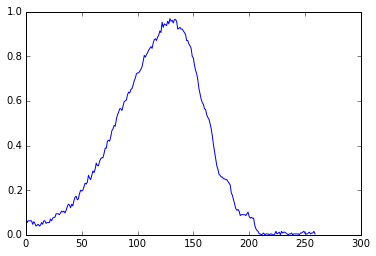

In [16]:
plt.plot(sec)

In [17]:
x_grid = np.linspace(0, 250, 10000)

In [18]:
x_grid = np.arange(0, len(sec))

In [24]:
xs = np.random.choice(x_grid, size=1000000, replace=True, p=sec / sec.sum())

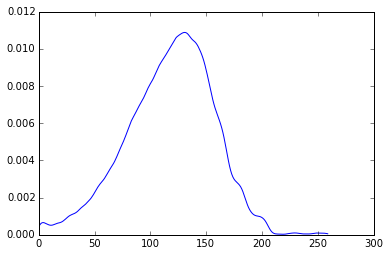

In [25]:
kde = sp.stats.gaussian_kde(xs)
plt.plot(kde.evaluate(x_grid))